# Machine Learning Assignment: Linear Regression on the Boston Housing Dataset


#### Objective:
The aim of this assignment is to apply your understanding of linear regression to the Boston Housing dataset. This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms. This hands-on assignment will guide you through the process of data loading, cleaning, exploration, and applying linear regression models.


#### Part 1: Data Preparation

Load the Boston Housing dataset. You can load it using `sklearn.datasets.load_boston()` or any other method you prefer.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [3]:
df=pd.read_csv(r"C:\Users\assis\Downloads\MASAI DBMS\Google colab file\Excel_Csv_file\BostonHousing.csv")

In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


1. **Loading the Dataset**

Check for any missing or null values in the dataset. Handle missing values if there are any. Provide a brief explanation of your approach.

In [5]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

2. **Data Cleaning**

Perform a basic statistical analysis of the dataset's features (mean, median, mode, etc.). Visualize the distribution of at least 3 variables using histograms or box plots. Use a scatter plot to visualize the relationship between the 'average number of rooms per dwelling' and the median value of homes.

Text(0.5, 1.0, 'Relationship between Rooms and Home Value')

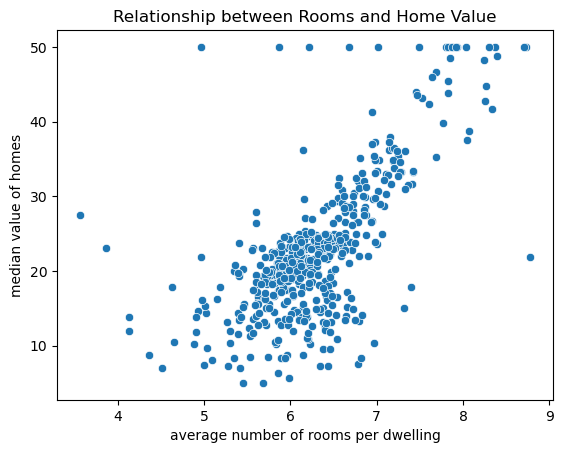

In [7]:
import seaborn as sns
sns.scatterplot(x='rm',y='medv',data=df)
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("median value of homes")
plt.title('Relationship between Rooms and Home Value')

In [8]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

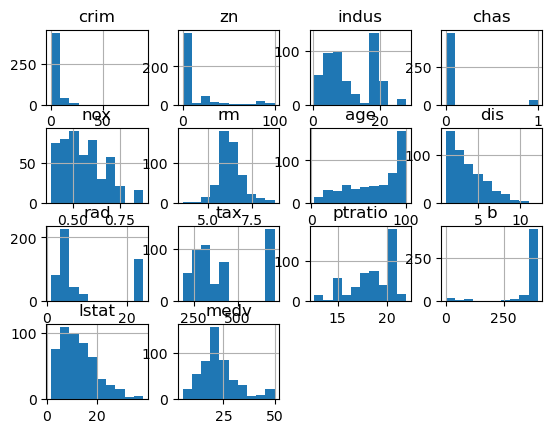

In [9]:

df.hist()

<Axes: >

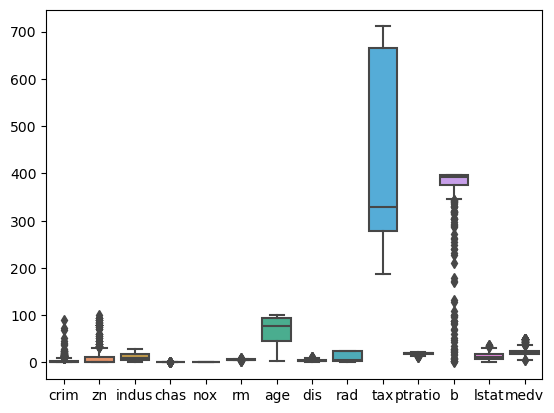

In [10]:
sns.boxplot(data=df)


<Axes: >

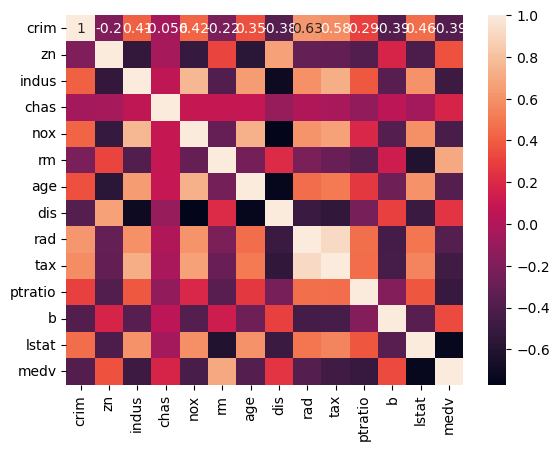

In [11]:
sns.heatmap(df.corr(),annot=True)

#### Part 2: Linear Regression Analysis

Choose a single predictor variable and the median value of homes as the response variable. Split the dataset into training and testing sets using an appropriate split ratio. Implement a simple linear regression model to predict the median value of homes based on the predictor variable you have chosen. Evaluate the model's performance using appropriate metrics (e.g., R-squared, Mean Squared Error).

In [12]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Splitting Dataset

In [13]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.4,random_state=42)

In [14]:
train_input=train_df[['rm']]
train_output=train_df[['medv']]
test_input=test_df[['rm']]
test_output=test_df[['medv']]

# Fitting the Model

In [15]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [16]:
linear.fit(train_input,train_output)

LinearRegression()

In [34]:
train_pred=linear.predict(train_input)
test_pred=linear.predict(test_input)

In [38]:
train_pred_d=pd.DataFrame(train_pred)

In [81]:
test_input.head(1)

,rm
173,6.416


In [83]:
prediction = linear.predict(np.array([[6.416]]))

print("Predicted output:", prediction)

Predicted output: [[23.76428051]]


C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [82]:
test_output.head(1)

,medv
173,23.6


In [28]:
test_pred_d=pd.DataFrame(test_pred)

In [31]:
test_pred_d=test_pred_d.rename(columns={0:'medv'})

In [84]:
test_pred_d.head(1)

,medv
0,23.764281


In [85]:
train_input.head(1)

,rm
304,7.236


In [86]:
train_pred_d.head(1)

,0
0,31.124474


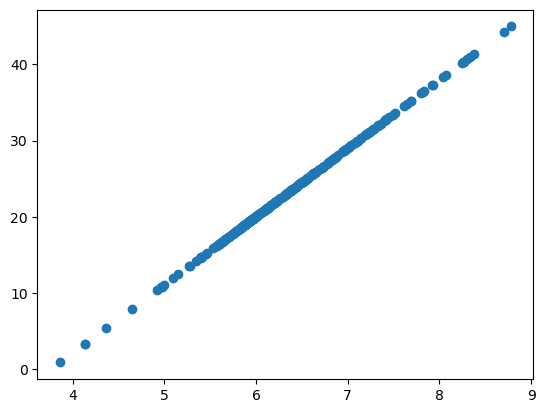

In [49]:
plt.scatter(train_input,train_pred_d)

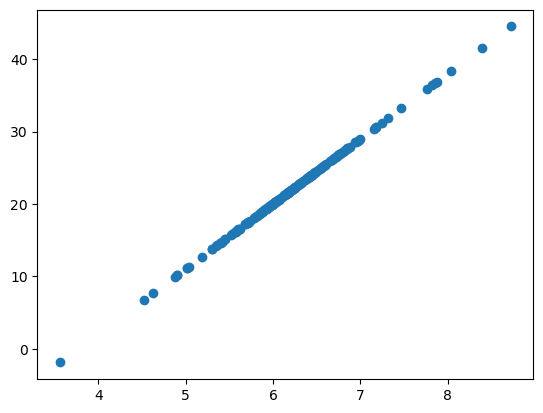

In [66]:
plt.scatter(test_input,test_pred)

# Evaluation


In [89]:
from sklearn.metrics import mean_squared_error
print("root_mean_square_value---Train-Data")
mse(train_output,train_pred,squared=False)


root_mean_square_value---Train-Data


6.784851877802831

In [90]:
from sklearn.metrics import mean_squared_error as mse
print("root_mean_square_value---Test-Data")
mse(test_output,test_pred,squared=False)

root_mean_square_value---Test-Data


6.324116652201315

In [92]:
from sklearn.metrics import r2_score
print("R2 Score---Train-Data")
r2_score(train_output,train_pred)

R2 Score---Train-Data


0.48407586350750975

In [93]:
from sklearn.metrics import r2_score
print("R2 Score---Test-Data")

r2_score(test_output,test_pred)

R2 Score---Test-Data


0.47336628730216146

<Axes: >

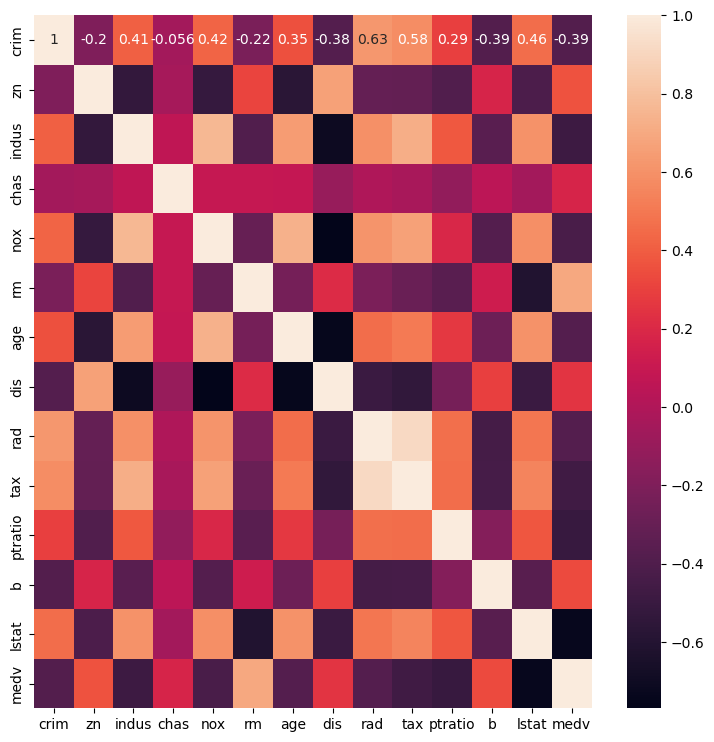

In [53]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

1. **Simple Linear Regression**

Now, choose multiple predictor variables that you hypothesize might influence the median value of homes. Implement a multiple linear regression model using the selected predictor variables. Evaluate and compare the performance of your multiple linear regression model to the simple linear regression model.

In [54]:
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)
M_train_input=train_df[['rad','tax','lstat']]
M_train_output=train_df[['medv']]
M_test_input=test_df[['rad','tax','lstat']]
M_test_output=test_df[['medv']]

In [55]:
from sklearn.linear_model import LinearRegression
mult_model=LinearRegression()
mult_model

LinearRegression()

In [56]:
mult_model.fit(M_train_input,M_train_output)

LinearRegression()

In [57]:
M_train_pred=mult_model.predict(M_train_input)
M_test_pred=mult_model.predict(M_test_input)

In [58]:
from sklearn.metrics import mean_squared_error as mse
mse(M_test_output,M_test_pred,squared=False)

5.580892035026715

In [59]:
from sklearn.metrics import r2_score
r2_score(M_test_output,M_test_pred)

0.5752795701466513

#### Part 3: Model Interpretation and Evaluation

Interpret the coefficients of your linear regression model. What does each coefficient represent in the context of the problem?

In [60]:
linear.intercept_

array([-33.82474315])

In [61]:
mult_model.intercept_

array([38.03340898])

In [62]:
linear.coef_

array([[8.97584533]])

In [63]:
mult_model.coef_

array([[ 0.19111121, -0.01443896, -0.89836025]])

1. **Model Interpretation**

Discuss the model performance. How well does your model predict the median value of homes? Reflect on the limitations of your linear regression model and how it might be improved.

ANS------

As we R2 score for the single input in the linear regression is-----0.47336628730216146 (Which is less then 1 so, our model fit is not better
But,
As we see R2 score for the multiple input in multiple linear regression is----0.5752795701466513(which is some what closer to 1 so, we can say that this is the better fit for our model prediction 

and the train RMSE value=====6.784851877802831
    the test RMSE value =====6.324116652201315
    
    so as we see the difference between these two train the test data is very less so we can say that our model is giving the best performance
    


#### Submission Guidelines:
- Provide detailed explanations and interpretations for each part of the assignment.
- Include comments in your code to explain each step of your implementation.
- Your submission should be well-organized and clearly documented, showing both your code and analysis.
- Submit your assignment as a Jupyter Notebook file (.ipynb).
